# Machine Learning 101

# Machine Learning as Function Approximation

$\textbf{x}$... vectorial description of the object you want to make predictions for.

$y$... target value; numeric (regression), mutually exclusive class-label (classification).

$h$... hypothesis (aka model); function that $h: \textbf{x} \mapsto y$.

Goal: find $h$ from *example* pairs of $(\textbf{x}, y)$.

Populating the interactive namespace from numpy and matplotlib


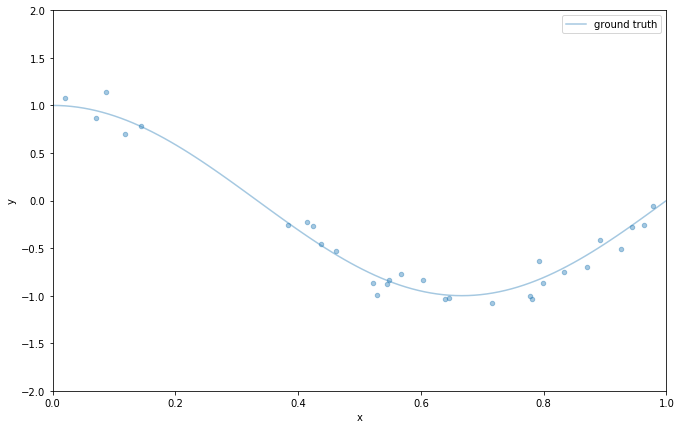

In [1]:
%pylab inline
import utils
X, y = utils.generate_curve_data()
fig = utils.plot_data(X, y, fn=utils.true_fn)

# Function Approximation

Can we recover the grund truth: `f(x) = cos(1.5 * pi * x)` from just the datapoints? 

Hypothesis class: straight line, `h(x) = slope * x + intercept`

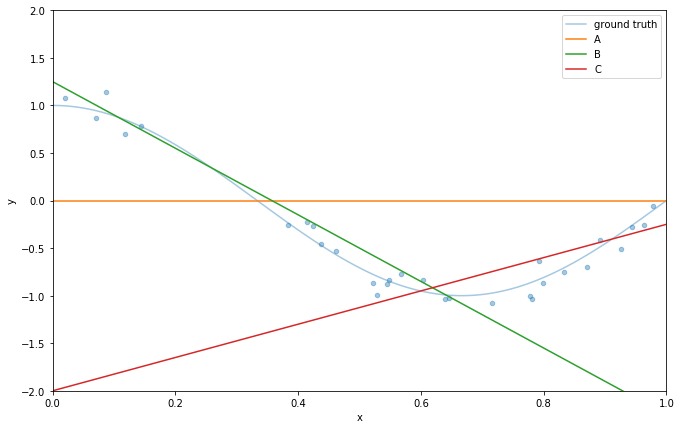

In [2]:
X, y = utils.generate_curve_data()
fig = utils.plot_data(X, y, fn=utils.true_fn)
x_plot = np.linspace(0, 1, 100)
plt.plot(x_plot, (x_plot * 0.0 ) + 0.0, label='A')
plt.plot(x_plot, (x_plot * -3.5 ) + 1.25, label='B')
plt.plot(x_plot, (x_plot * 1.75 ) - 2.0, label='C')
plt.legend()

# Which Model to Select?

Which of the lines `A`, `B`, or `C` is the best model?

In ML we look for the one with the lowest *generalization error*

$ G = \int_ \! E(h^*(\mathbf{x}), y) \, \mathrm{d}P(\mathbf{x}, y).$

Which we cannot measure as $P(\mathbf{x}, y).$ is unknown. 
We only have access to a sample that is drawn i.i.d. from the distribution.

Different *inductive principles* can help us here:
  * Empirical Risk Minimization
  * Structural Risk Minimization
  * ...

# Curve fitting with scikit-learn

```python
class Estimator(BaseEstimator):
    
    def __init__(self, a_hyper_parameter=0):
        """Constructor sets the estimators hyper-parameters. 
        
        Parameters
        ----------
        a_hyper_parameter : int
            A parameter that controls how the estimator is fit.
        """
        self.a_hyper_parameter = a_hyper_parameter
  
    def fit(self, X, y=None):
        """Fits estimator's parameters (mind the underscore) from X and y. """
        # set state of ``self``
        self.state_ = None
        return self
            
    def predict(self, X):
        """Predict response of ``X``. """
        # compute predictions ``pred``
        return pred
```


In [4]:
from sklearn.linear_model import LinearRegression

help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, o

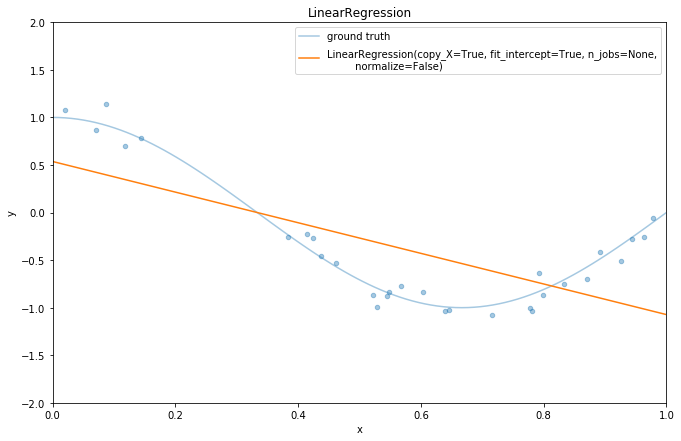

In [5]:
est = LinearRegression()
est.fit(X[:, np.newaxis], y)

fig = utils.plot_data(X, y, fn=utils.true_fn, title='LinearRegression')
utils.plot_estimator(est, fig)

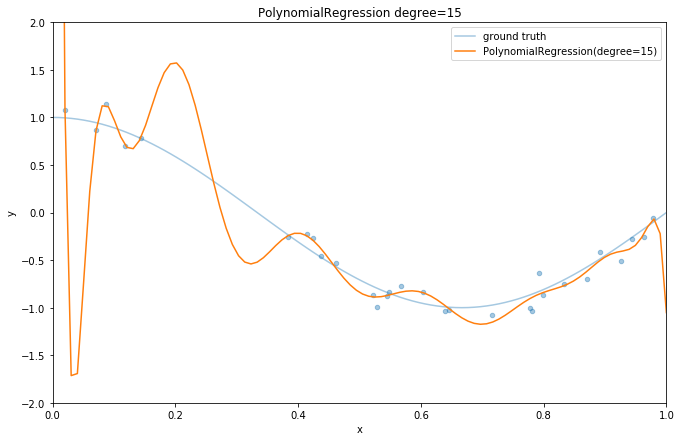

In [6]:
est = utils.PolynomialRegression(degree=15)
est.fit(X[:, np.newaxis], y)

fig = utils.plot_data(X, y, fn=utils.true_fn, title='PolynomialRegression degree=15')
utils.plot_estimator(est, fig)

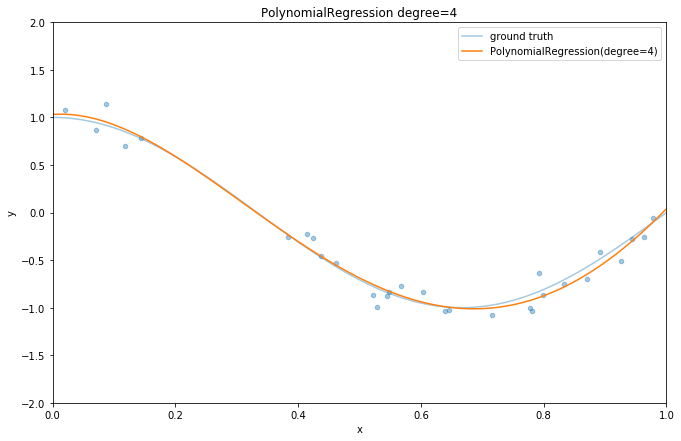

In [7]:
est = utils.PolynomialRegression(degree=4)
est.fit(X[:, np.newaxis], y)

fig = utils.plot_data(X, y, fn=utils.true_fn, title='PolynomialRegression degree=4')
utils.plot_estimator(est, fig)

# ML as Search in Model Space

<img src="img/eslii-mdl-search.png">
<div style="text-align: right">Source: T. Hastie et al. (2017) "Elements of Statistical Learning (Ed. 2)"</div>

# Bias and Variance

<img src="img/fortmannroe-bias-var.png">
<div style="text-align: right">Source: Scott Fortmann-Roe (2012) "Understanding the Bias-Variance Tradeoff"</div>

# Bias and Variance - Error Decomposition

<img src="img/fortmannroe-bias-var-decomp.png">
<div style="text-align: right">Source: Scott Fortmann-Roe (2012) "Understanding the Bias-Variance Tradeoff"</div>

# Underfitting vs Overfitting

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fit degrees 1 to 20 on 25 random datasets, record train-test error
res = []
degrees = list(range(1, 20))
for degree in degrees:
    for rep in range(25):
        X, y = utils.generate_curve_data(n_samples=80, seed=rep)
        X_train, X_test, y_train, y_test = train_test_split(X[:, np.newaxis], y, test_size=.2, random_state=0)
        est = utils.PolynomialRegression(degree=degree).fit(X_train, y_train)
        res.append({'train_err': np.sqrt(mean_squared_error(y_train, est.predict(X_train))),
                    'test_err': np.sqrt(mean_squared_error(y_test, est.predict(X_test))),
                    'degree': degree,
                    'rep': rep})
        
err = pd.DataFrame(res)

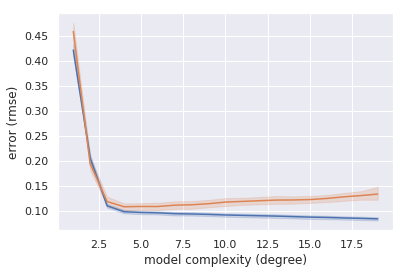

In [9]:
import seaborn as sns
sns.set()
_ = sns.lineplot(x='degree', y='train_err', data=err)
ax = sns.lineplot(x='degree', y='test_err', data=err)
_ = ax.set(xlabel='model complexity (degree)', ylabel='error (rmse)')

In [10]:
err

,degree,rep,test_err,train_err
0,1,0,0.468485,0.426897
1,1,1,0.461180,0.405414
2,1,2,0.446120,0.441503
3,1,3,0.407995,0.388545
4,1,4,0.492337,0.445140
5,1,5,0.463691,0.454484
6,1,6,0.467617,0.426372
7,1,7,0.455036,0.396799
8,1,8,0.504106,0.463498
9,1,9,0.463654,0.425704
